<a href="https://colab.research.google.com/github/lucas-t-reis/data-science/blob/master/Imdb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploratory Analysis of the IMDB dataset
- This dataset contains around five thousand samples taken from imdb database. 
- The main goals in this notebook are to explore **pandas** and **seaborn** as tools for generating insights about data, and practice fundamentals of data science/data-visualization.

## Setup
Importing libraries and datasets

In [141]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

imdb = pd.read_csv("https://raw.githubusercontent.com/lucas-t-reis/data-science/master/datasets/imdb/imdb5000.csv")
imdb.head(10)


,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,4834,Wes Studi,0.0,avatar|future|marine|native|paraplegic,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,471220,48350,Jack Davenport,0.0,goddess|marriage ceremony|marriage proposal|pi...,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,Christoph Waltz,Spectre,275868,11700,Stephanie Sigman,1.0,bomb|espionage|sequel|spy|terrorist,http://www.imdb.com/title/tt2379713/?ref_=fn_t...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,Tom Hardy,The Dark Knight Rises,1144337,106759,Joseph Gordon-Levitt,0.0,deception|imprisonment|lawlessness|police offi...,http://www.imdb.com/title/tt1345836/?ref_=fn_t...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,Doug Walker,Star Wars: Episode VII - The Force Awakens ...,8,143,NaN,0.0,NaN,http://www.imdb.com/title/tt5289954/?ref_=fn_t...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0
5,Color,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73058679.0,Action|Adventure|Sci-Fi,Daryl Sabara,John Carter,212204,1873,Polly Walker,1.0,alien|american civil war|male nipple|mars|prin...,http://www.imdb.com/title/tt0401729/?ref_=fn_t...,738.0,English,USA,PG-13,263700000.0,2012.0,632.0,6.6,2.35,24000
6,Color,Sam Raimi,392.0,156.0,0.0,4000.0,James Franco,24000.0,336530303.0,Action|Adventure|Romance,J.K. Simmons,Spider-Man 3,383056,46055,Kirsten Dunst,0.0,sandman|spider man|symbiote|venom|villain,http://www.imdb.com/title/tt0413300/?ref_=fn_t...,1902.0,English,USA,PG-13,258000000.0,2007.0,11000.0,6.2,2.35,0
7,Color,Nathan Greno,324.0,100.0,15.0,284.0,Donna Murphy,799.0,200807262.0,Adventure|Animation|Comedy|Family|Fantasy|Musi...,Brad Garrett,Tangled,294810,2036,M.C. Gainey,1.0,17th century|based on fairy tale|disney|flower...,http://www.imdb.com/title/tt0398286/?ref_=fn_t...,387.0,English,USA,PG,260000000.0,2010.0,553.0,7.8,1.85,29000
8,Color,Joss Whedon,635.0,141.0,0.0,19000.0,Robert Downey Jr.,26000.0,458991599.0,Action|Adventure|Sci-Fi,Chris Hemsworth,Avengers: Age of Ultron,462669,92000,Scarlett Johansson,4.0,artificial intelligence|based on comic book|ca...,http://www.imdb.com/title/tt2395427/?ref_=fn_t...,1117.0,English,USA,PG-13,250000000.0,2015.0,21000.0,7.5,2.35,118000
9,Color,David Yates,375.0,153.0,282.0,10000.0,Daniel Radcliffe,25000.0,301956980.0,Adventure|Family|Fantasy|Mystery,Alan Rickman,Harry Potter and the Half-Blood Prince,321795,58753,Rupert Grint,3.0,blood|book|love|potion|professor,http://www.imdb.com/title/tt0417741/?ref_=fn_t...,973.0,English,UK,PG,250000000.0,2009.0,11000.0,7.5,2.35,10000


## Filtering dataset
Eliminating duplicates and lines with **NaN**


In [0]:
imdb = imdb.drop_duplicates().dropna()

# Time to dig in the data!
Let's try to answer a few questions:
 
 - Which are the movie counts for each director?
 - Which movies did profit the most?

 - Is there a correlation between budget and profit?
 - Is there a correlation between rating and profit?
 - Which actors participated in more movies?
 - Which actors participated more in the most profiting movies?

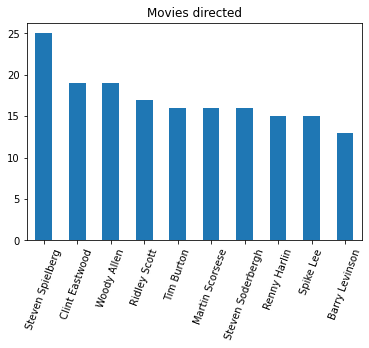

In [143]:
movies_per_director = imdb["director_name"].value_counts()
movies_per_director[0:10].plot(kind="bar", rot=70, title="Movies directed")
plt.show()

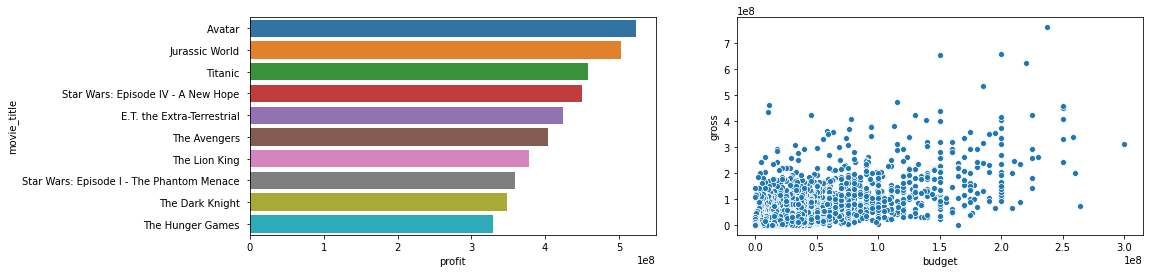

In [144]:
# Which movie did profit the most
# Since there are movies with different grossing currencies, we will filter for movies from USA to have a single money metric
imdb["profit"] = imdb["gross"] - imdb["budget"]
imdb_USA = imdb.query(" country == 'USA' & (budget > 0 | gross > 0) ")

# Plotting specs
plt.figure(figsize=(16,4))
plt.subplot(1,2,1)

# Getting a slice of the data with the top grossing movies
top10_profits = imdb_USA.sort_values(by="profit", ascending=False)[0:10]
sns.barplot(x="profit", y="movie_title", data=top10_profits)


# Viewing global behavior of budget x profit
plt.subplot(1,2,2)
sns.scatterplot(x="budget", y="gross", data=imdb_USA)
plt.show()

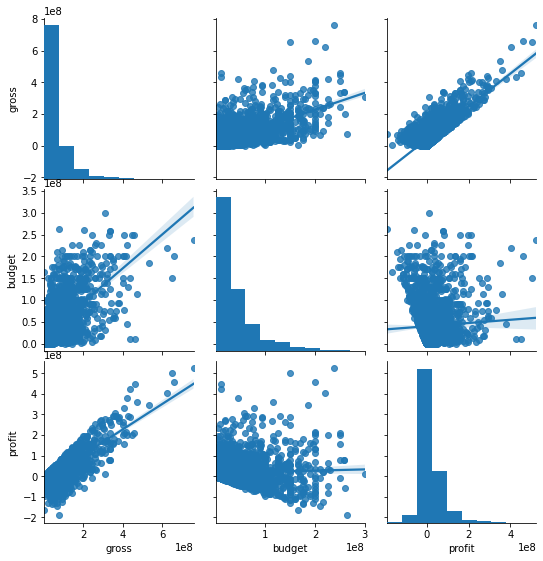

In [145]:
## Is there a correlation between gross, budget and profit?
sns.pairplot(imdb_USA[["gross", "budget","profit"]], kind="reg")
plt.show()

 Observations from the pairplots:


 - From the plots above we can see a correlation between gross and profit, which is to be expected.

 - There is a degree of correlation, even if not much, between budget and gross. This **could** indicated that having a certain budget is required to have a higher gross **BUT** it doesn't mean that there is a correlation between budget and profit, since the data points doesn't seem to be well explained by the regression. 


 Now let's look what happens between IMDB score and movie profit:

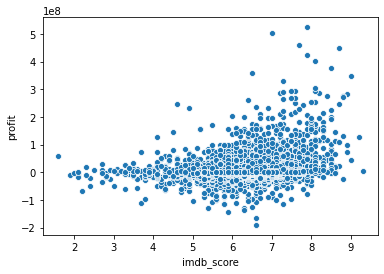

,imdb_score,profit
imdb_score,1.000000,0.297647
profit,0.297647,1.000000


In [146]:
score_profit = imdb_USA[["imdb_score", "profit"]]
sns.scatterplot(x="imdb_score", y="profit", data=score_profit)
plt.show()
score_profit.corr()

As we can see above, there doesn't seem to be a strong correlation between IMDB score and movie profit. For this dataset this means that even if a movie gets a good score, there is no guarantee that it will have a good profit. The analogous is valid for a movie with a bad IMDB score.


Let's see now which actor/actress participated in more movies.

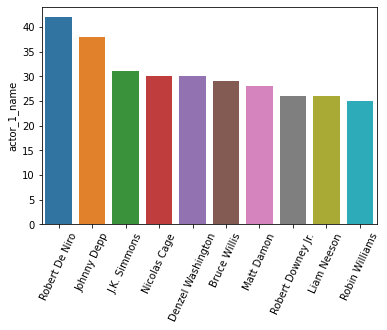

In [147]:
# Getting the top 10
movie_participations = imdb["actor_1_name"].value_counts()[0:10]
chart = sns.barplot(x=movie_participations.index, y=movie_participations)
chart.set_xticklabels(chart.get_xticklabels(), rotation="65")
plt.show()

- The first notable thing is there are no actresses in the top 10 list  - Scarlett Johansson is the first to appear but only after 20 or so male counterparts.
- The second thing is that after the top 3, number os castings vary by a small difference.


Knowing which actor/actress was casted the most, does that mean that a movie that profits a lot has him/her on their payroll? Let's find out:



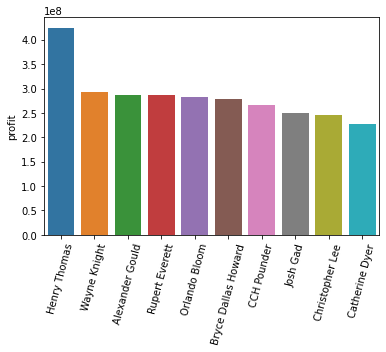

In [148]:
# Getting mean profit of movies in which actor/actress X participated (filtering for movies that didn't profit)
actor_profit = imdb_USA[["actor_1_name", "profit"]].query("profit > 0").groupby("actor_1_name").mean()
actor_profit = actor_profit.sort_values(by="profit", ascending=False)

# Plotting
chart = sns.barplot(x=actor_profit.index[0:10], y="profit", data=actor_profit[0:10])
chart.set_xticklabels(labels=chart.get_xticklabels(), rotation="75")
chart.set_xlabel("")
plt.show()


As we can see from the chart, being more famous than other actors doesn't imply in participating on high grossing movies (on average).